In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load dataset
df = pd.read_csv("employee_performance.csv")

# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EmployeeID          20 non-null     int64 
 1   Education           20 non-null     int64 
 2   Experience          20 non-null     int64 
 3   WorkHoursPerWeek    20 non-null     int64 
 4   JobSatisfaction     20 non-null     int64 
 5   ProjectCount        20 non-null     int64 
 6   TrainingsCompleted  20 non-null     int64 
 7   PerformanceRating   20 non-null     object
dtypes: int64(7), object(1)
memory usage: 1.4+ KB
None
       EmployeeID  Education  Experience  WorkHoursPerWeek  JobSatisfaction  \
count    20.00000  20.000000   20.000000         20.000000        20.000000   
mean    110.50000   3.300000    5.900000         42.500000         3.950000   
std       5.91608   0.923381    2.531902          4.628288         0.998683   
min     101.00000   2.000000    2.000000       

In [3]:
# Encode 'PerformanceRating' (target)
label_encoder = LabelEncoder()
df['PerformanceRating'] = label_encoder.fit_transform(df['PerformanceRating'])

# View mapping: {'Average': 0, 'High': 1, 'Low': 2} (you can print this to confirm)
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Average': 0, 'High': 1, 'Low': 2}


In [4]:
# Drop EmployeeID (not useful for prediction)
df = df.drop("EmployeeID", axis=1)

# Split features and target
X = df.drop("PerformanceRating", axis=1)
y = df["PerformanceRating"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Confusion Matrix:
 [[2 0]
 [0 2]]


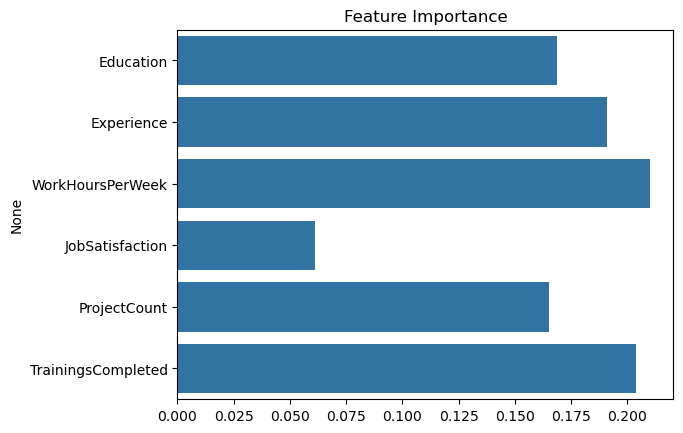

In [8]:
importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [9]:
import joblib

# Save the trained model and scaler
joblib.dump(model, 'employee_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [10]:
df.head()

,Education,Experience,WorkHoursPerWeek,JobSatisfaction,ProjectCount,TrainingsCompleted,PerformanceRating
0,3,5,40,4,3,2,0
1,4,8,45,5,5,3,1
2,2,3,38,3,2,1,2
3,3,6,42,4,4,2,0
4,4,7,44,4,5,3,1
